In [2]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.DataFrame()

In [4]:
df['x1']=[1,2,3,4,5,6,7,8,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

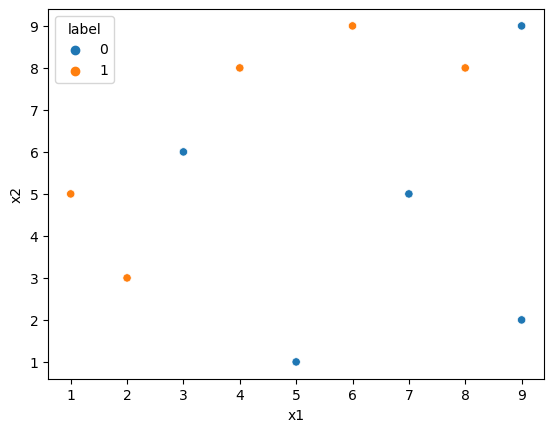

In [7]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [8]:
df['weights']=1/df.shape[0]

In [9]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1=DecisionTreeClassifier(max_depth=1)

In [15]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [16]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

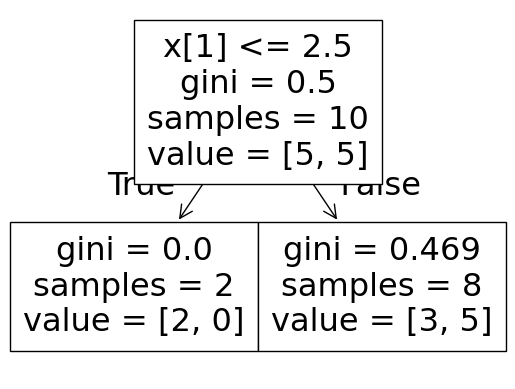

In [17]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

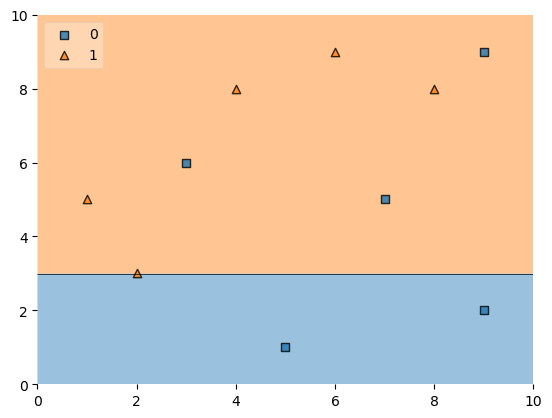

In [18]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [19]:
df['y_pred']=dt1.predict(X)

In [20]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,7,5,0,0.1,1
7,8,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [21]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [22]:
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [23]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [24]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [25]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,7,5,0,0.1,1,0.152653
7,8,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [26]:
df['updated_weights'].sum()

0.9165153319682015

In [27]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [28]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,7,5,0,0.1,1,0.152653,0.166559
7,8,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [29]:
df['normalized_weights'].sum()

1.0

In [30]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [31]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [33]:
df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,7,5,0,0.1,1,0.152653,0.523933,0.690492
7,8,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [34]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a>row['cumsum_lower']:
                indices.append(index)
    return indices            

In [35]:
index_values=create_new_dataset(df)
index_values

[6, 9, 5, 3, 3, 6, 8, 2, 6, 4]

In [36]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [37]:
second_df

,x1,x2,label,weights
6,7,5,0,0.1
9,9,2,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
6,7,5,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
6,7,5,0,0.1
4,5,1,0,0.1


In [44]:
dt2=DecisionTreeClassifier(max_depth=1)

In [45]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [46]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

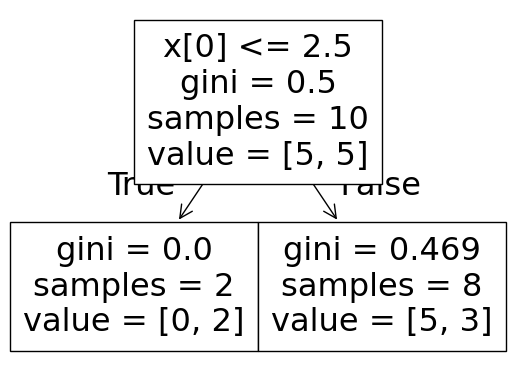

In [47]:
plot_tree(dt2)

<Axes: >

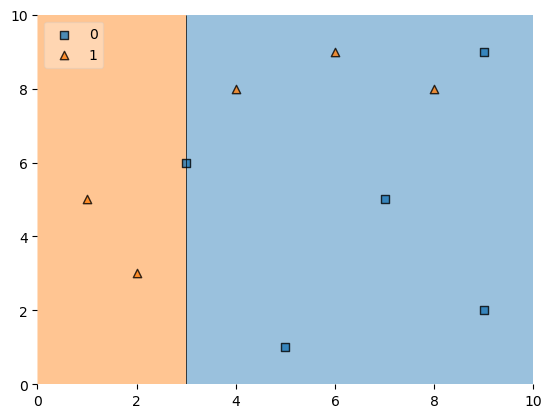

In [48]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [70]:
second_df['y_pred']=dt1.predict(X)

In [71]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
6,7,5,0,0.1,1,0.065508,0.060055,0.060055,0.000000
9,9,2,0,0.1,1,0.152653,0.139945,0.200000,0.060055
5,6,9,1,0.1,1,0.152653,0.139945,0.339945,0.200000
3,4,8,1,0.1,1,0.152653,0.139945,0.479891,0.339945
3,4,8,1,0.1,0,0.152653,0.139945,0.619836,0.479891
6,7,5,0,0.1,1,0.065508,0.060055,0.679891,0.619836
8,9,9,0,0.1,1,0.065508,0.060055,0.739945,0.679891
2,3,6,0,0.1,1,0.065508,0.060055,0.800000,0.739945
6,7,5,0,0.1,1,0.065508,0.060055,0.860055,0.800000
4,5,1,0,0.1,0,0.152653,0.139945,1.000000,0.860055


In [72]:
alpha2=calculate_model_weight(0.7)

In [73]:
alpha2

-0.4236489301936017

In [74]:
def update_row_weights(row,alpha=-0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [75]:
second_df['updated_weights']=df.apply(update_row_weights,axis=1)

In [76]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
6,7,5,0,0.1,1,0.065508,0.060055,0.060055,0.000000
9,9,2,0,0.1,1,0.152653,0.139945,0.200000,0.060055
5,6,9,1,0.1,1,0.152653,0.139945,0.339945,0.200000
3,4,8,1,0.1,1,0.152653,0.139945,0.479891,0.339945
3,4,8,1,0.1,0,0.152653,0.139945,0.619836,0.479891
6,7,5,0,0.1,1,0.065508,0.060055,0.679891,0.619836
8,9,9,0,0.1,1,0.065508,0.060055,0.739945,0.679891
2,3,6,0,0.1,1,0.065508,0.060055,0.800000,0.739945
6,7,5,0,0.1,1,0.065508,0.060055,0.860055,0.800000
4,5,1,0,0.1,0,0.152653,0.139945,1.000000,0.860055


In [77]:
second_df['normalized_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [78]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
6,7,5,0,0.1,1,0.065508,0.060055,0.060055,0.000000
9,9,2,0,0.1,1,0.152653,0.139945,0.200000,0.060055
5,6,9,1,0.1,1,0.152653,0.139945,0.339945,0.200000
3,4,8,1,0.1,1,0.152653,0.139945,0.479891,0.339945
3,4,8,1,0.1,0,0.152653,0.139945,0.619836,0.479891
6,7,5,0,0.1,1,0.065508,0.060055,0.679891,0.619836
8,9,9,0,0.1,1,0.065508,0.060055,0.739945,0.679891
2,3,6,0,0.1,1,0.065508,0.060055,0.800000,0.739945
6,7,5,0,0.1,1,0.065508,0.060055,0.860055,0.800000
4,5,1,0,0.1,0,0.152653,0.139945,1.000000,0.860055


In [79]:
second_df['cumsum_upper']=np.cumsum(second_df['normalized_weights'])

In [80]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalized_weights']

In [81]:
second_df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
6,7,5,0,0.1,1,0.065508,0.000000,0.060055
9,9,2,0,0.1,1,0.152653,0.060055,0.200000
5,6,9,1,0.1,1,0.152653,0.200000,0.339945
3,4,8,1,0.1,1,0.152653,0.339945,0.479891
3,4,8,1,0.1,0,0.152653,0.479891,0.619836
6,7,5,0,0.1,1,0.065508,0.619836,0.679891
8,9,9,0,0.1,1,0.065508,0.679891,0.739945
2,3,6,0,0.1,1,0.065508,0.739945,0.800000
6,7,5,0,0.1,1,0.065508,0.800000,0.860055
4,5,1,0,0.1,0,0.152653,0.860055,1.000000


In [82]:
index_values=create_new_dataset(second_df)
index_values

[5, 3, 3, 8, 2, 9, 5, 9, 2, 4]

In [83]:
third_df=df.iloc[index_values,[0,1,2,3]]

In [84]:
third_df

,x1,x2,label,weights
5,6,9,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
9,9,2,0,0.1
5,6,9,1,0.1
9,9,2,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1


In [85]:
dt3=DecisionTreeClassifier(max_depth=1)

In [86]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [87]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

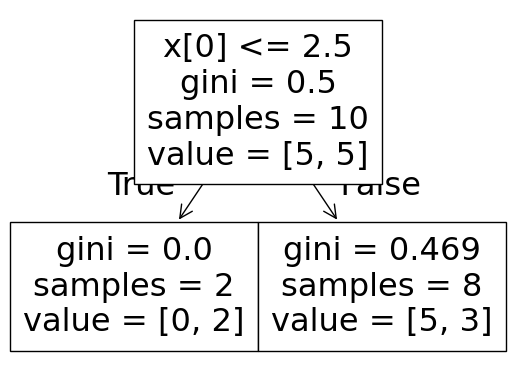

In [88]:
plot_tree(dt3)

<Axes: >

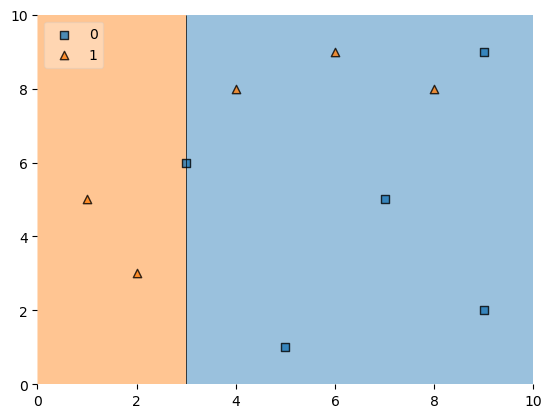

In [89]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [90]:
print(alpha1,alpha2)

0.42364893019360184 -0.4236489301936017


In [91]:
query=np.array([1,5]).reshape(1,2)

In [92]:
dt1.predict(query)

array([1], dtype=int64)

In [93]:
dt2.predict(query)

array([1], dtype=int64)

In [94]:
alpha1*(1)+alpha2*(1)

1.1102230246251565e-16

In [95]:
np.sign(1.11)

1.0